# AffectNet dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt  # plot
import os
from os.path import join

path = ('/kaggle/input/affectnet-training-data/')
file = (path + 'labels.csv')
df = pd.read_csv(file)
df.head()

,Unnamed: 0,pth,label,relFCs
0,0,anger/image0000006.jpg,surprise,0.873142
1,1,anger/image0000060.jpg,anger,0.852311
2,2,anger/image0000061.jpg,anger,0.800957
3,3,anger/image0000066.jpg,disgust,0.843079
4,4,anger/image0000106.jpg,anger,0.849108


In [2]:
df.describe()

,Unnamed: 0,relFCs
count,28175.000000,28175.000000
mean,14087.000000,0.799247
std,8133.566253,0.058755
min,0.000000,0.516357
25%,7043.500000,0.766363
50%,14087.000000,0.809000
75%,21130.500000,0.842068
max,28174.000000,0.899951


In [3]:
df.hist

<bound method hist_frame of        Unnamed: 0                        pth     label    relFCs
0               0     anger/image0000006.jpg  surprise  0.873142
1               1     anger/image0000060.jpg     anger  0.852311
2               2     anger/image0000061.jpg     anger  0.800957
3               3     anger/image0000066.jpg   disgust  0.843079
4               4     anger/image0000106.jpg     anger  0.849108
...           ...                        ...       ...       ...
28170       28170  surprise/image0034960.jpg  surprise  0.825263
28171       28171  surprise/image0034961.jpg  surprise  0.738646
28172       28172  surprise/image0034966.jpg  surprise  0.774524
28173       28173  surprise/image0034973.jpg   neutral  0.766952
28174       28174  surprise/image0042075.jpg   disgust  0.832160

[28175 rows x 4 columns]>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28175 entries, 0 to 28174
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  28175 non-null  int64  
 1   pth         28175 non-null  object 
 2   label       28175 non-null  object 
 3   relFCs      28175 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 880.6+ KB


In [5]:
# Define an empty list
file_counts = []
def countFile(link):
    path = link
    num_files = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
    file_counts.append(num_files)
    print(f"Number of files in directory {link} is ", num_files)
    return num_files

In [6]:
classes_count = []

classes_count.append(countFile("/kaggle/input/affectnet-training-data/happy"))

classes_count.append(countFile("/kaggle/input/affectnet-training-data/sad"))

classes_count.append(countFile("/kaggle/input/affectnet-training-data/surprise"))

classes_count.append(countFile("/kaggle/input/affectnet-training-data/anger"))

classes_count.append(countFile("/kaggle/input/affectnet-training-data/neutral"))

Number of files in directory /kaggle/input/affectnet-training-data/happy is  5044
Number of files in directory /kaggle/input/affectnet-training-data/sad is  3091
Number of files in directory /kaggle/input/affectnet-training-data/surprise is  4039
Number of files in directory /kaggle/input/affectnet-training-data/anger is  3218
Number of files in directory /kaggle/input/affectnet-training-data/neutral is  5126


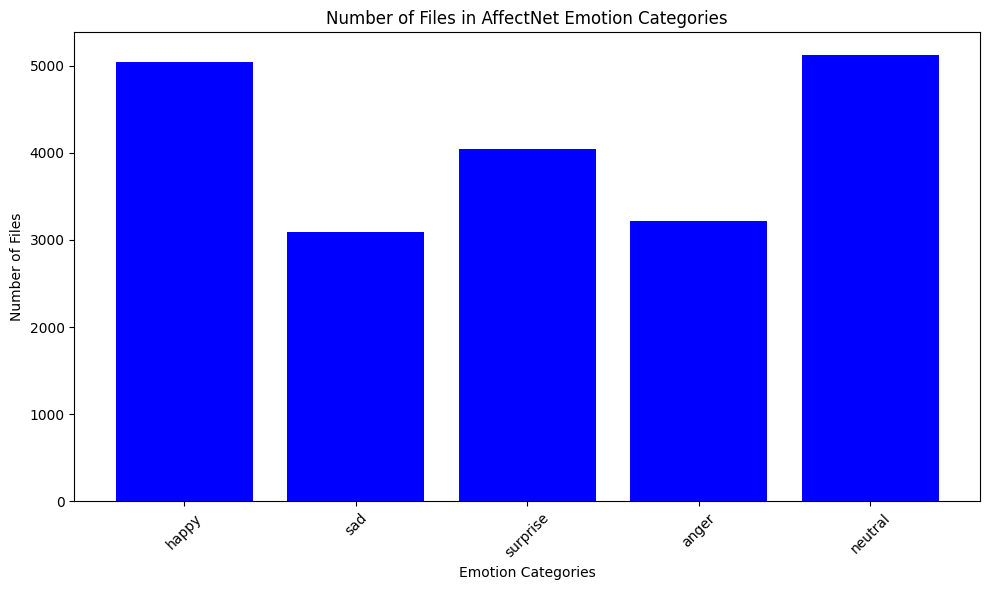

In [7]:
# Data
categories = ['happy', 'sad', 'surprise', 'anger', 'neutral']

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, file_counts, color='blue')
plt.xlabel('Emotion Categories')
plt.ylabel('Number of Files')
plt.title('Number of Files in AffectNet Emotion Categories')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

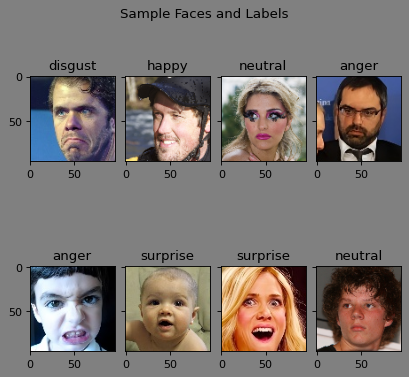

In [8]:
# display random images
import random
import cv2

fig, axs = plt.subplots(2, 4, sharey=True, constrained_layout=True, num=None,
                        figsize=(5, 5), dpi=80, facecolor='gray', edgecolor='k')
fig.suptitle("Sample Faces and Labels")
axs = axs.flatten()

for i in range(8):
    idx = random.randint(0, len(df)-1)  # randomly select an index
    img_path = path + df['pth'][idx]
    img = cv2.imread(img_path)  # read image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert to BGR to RGB
    axs[i].imshow(img)
    axs[i].set_title(df['label'][idx])

In [9]:
# how many emotions categories
INPUT_PATH = "/kaggle/input/affectnet-training-data/"

IMAGE_SIZE = (96, 96)

In [10]:
# define functions to pre-process and load images into arrays
import numpy as np
from keras.utils import to_categorical

emotion_label = [(1, "anger"), (2, "sad"), (3, "surprise"), (4, "happy"), (5, "neutral")]

def image_generator(input_path, emotion_label, image_size):
    for index, emotion in emotion_label:
        for filename in os.listdir(os.path.join(input_path, emotion)):
            img = cv2.imread(os.path.join(input_path, emotion, filename))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            #img = cv2.resize(img, image_size)
            #img = img.astype('float32') / 255.0  # Normilize
            yield img, index

def load_images(input_path, emotions, image_size):
    X, y = [], []
    for img, label in image_generator(input_path, emotions, image_size):
        X.append(img)
        y.append(label)
    X = np.array(X)
    y = np.array(y)
    return X, y

In [11]:
# Load the images
X, y = load_images(INPUT_PATH, emotion_label, IMAGE_SIZE)
input_shape = X[0].shape
print(type(X),type(y))
print(np.unique(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[1 2 3 4 5]


In [12]:
print(X.shape,y.shape)
print(y)

(20518, 96, 96, 3) (20518,)
[1 1 1 ... 5 5 5]


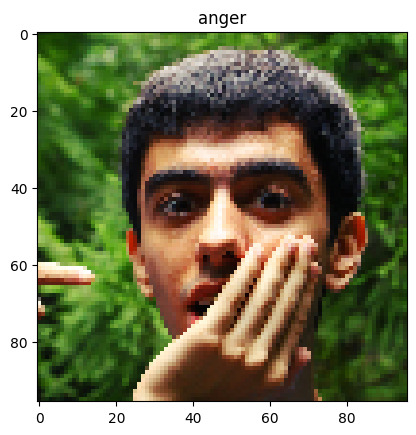

In [13]:
# choose a random image index
idx = np.random.randint(len(X))

# display the image and its corresponding label from arrays
plt.imshow(X[idx])
plt.title(emotion_label[np.argmax(y[idx])][1])
plt.show()

In [15]:
def shuffle_and_cut_data(X, y, threshold):
    num_classes = 7
    X_limited = []
    y_limited = []

    for class_idx in range(num_classes):
        class_indices = np.where(y[:] == class_idx + 1)[0]
        
        np.random.shuffle(class_indices)
        
        selected_indices = class_indices[:threshold]
        
        # Append the selected data
        X_limited.append(X[selected_indices])
        y_limited.append(y[selected_indices])

    # Concatenate the limited data
    X_limited = np.concatenate(X_limited, axis=0)
    y_limited = np.concatenate(y_limited, axis=0)

    # Shuffle the entire dataset
    shuffled_indices = np.random.permutation(len(y_limited))
    X_limited = X_limited[shuffled_indices]
    y_limited = y_limited[shuffled_indices]

    return X_limited, y_limited
X, y = shuffle_and_cut_data(X, y, threshold = min(classes_count))
print(X[0].shape)

(96, 96, 3)


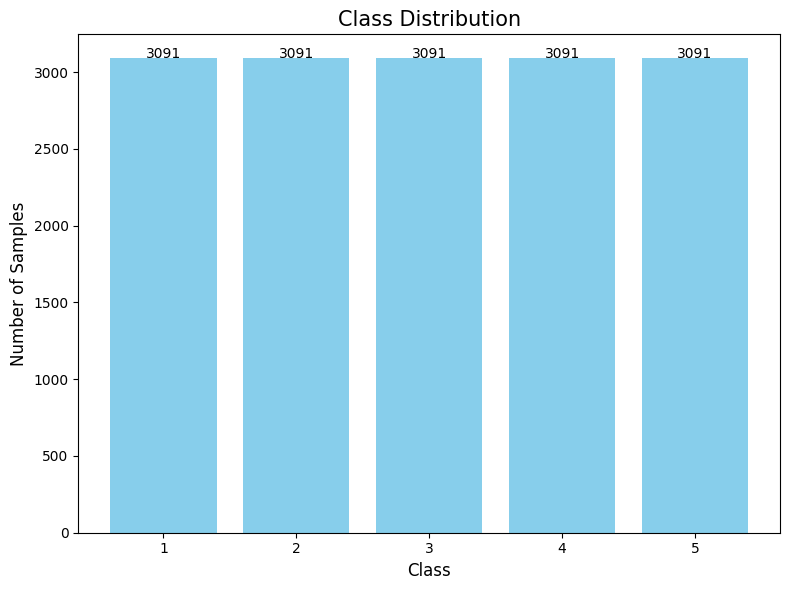

In [15]:
from collections import Counter

# Calculate class distribution
class_distribution = Counter(y)
class_labels = list(class_distribution.keys())
counts = list(class_distribution.values())

plt.figure(figsize=(8, 6))
plt.bar(class_labels, counts, color='skyblue')
plt.xlabel('Class', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.title('Class Distribution', fontsize=15)

for i, count in enumerate(counts):
    plt.text(class_labels[i], count + 0.5, str(count), ha='center', fontsize=10)
plt.xticks(ticks=class_labels, labels=[str(label) for label in class_labels], fontsize=10)
plt.tight_layout()
plt.show()

In [16]:
from tqdm import tqdm  # For progress bar

def preprocess_image(image):
    """
    Preprocesses an image using CLAHE, Morphological Illumination Correction, and Bilateral Filtering.
    
    Args:
        image (numpy array): Input image in BGR format.
        
    Returns:
        numpy array: Preprocessed image.
    """
    # Step 1: Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Step 2: Apply CLAHE for localized contrast enhancement
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    contrast_enhanced = clahe.apply(gray)
    
    # Step 3: Apply Morphological Illumination Correction
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
    background = cv2.morphologyEx(contrast_enhanced, cv2.MORPH_CLOSE, kernel)
    illumination_corrected = cv2.divide(contrast_enhanced, background, scale=255)
    
    # Step 4: Smooth with Bilateral Filter
    final_image = cv2.bilateralFilter(illumination_corrected, d=9, sigmaColor=75, sigmaSpace=75)
    
    return final_image

In [17]:
def preprocess_dataset(X):
    """
    Applies preprocessing to all images in the dataset.
    
    Args:
        X (numpy array): Input dataset of images in BGR format, shape (N, H, W, C).
        
    Returns:
        numpy array: Preprocessed dataset with the same shape as input.
    """
    preprocessed_images = []
    
    for img in tqdm(X, desc="Preprocessing Images"):
        preprocessed_image = preprocess_image(img)
        preprocessed_images.append(preprocessed_image)
    
    # Convert list to numpy array and expand dimensions for grayscale images
    preprocessed_images = np.array(preprocessed_images)
    preprocessed_images = np.expand_dims(preprocessed_images, axis=-1)  # Add channel dimension
    return preprocessed_images

In [18]:
# Apply preprocessing to the entire dataset
print("Original dataset shape:", X.shape)

X = preprocess_dataset(X)

# Verify shapes
print("Preprocessed dataset shape:", X.shape)

# Normalizing preprocessed images
X = X / 255.0
input_shape = X[0].shape
print(input_shape)

Original dataset shape: (15455, 96, 96, 3)


Preprocessing Images: 100%|██████████| 15455/15455 [00:29<00:00, 530.09it/s]


Preprocessed dataset shape: (15455, 96, 96, 1)
(96, 96, 1)


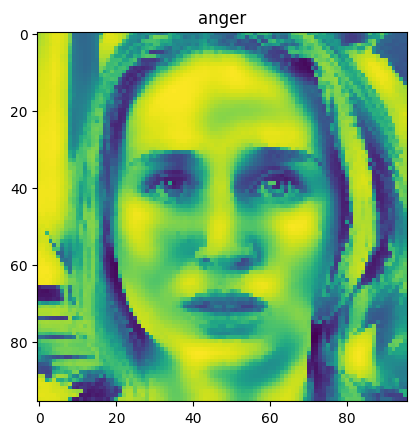

In [19]:
# choose a random image index
idx = np.random.randint(len(X))

# display the image and its corresponding label from arrays
plt.imshow(X[idx])
plt.title(emotion_label[np.argmax(y[idx])][1])
plt.show()

In [21]:
import cv2

# Load the Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in an image
image = cv2.imread("path_to_image.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# Draw rectangles around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Show image with detected faces
cv2.imshow("Faces", image)
cv2.waitKey(0)
cv2.destroyAllWindows()



ModuleNotFoundError: No module named 'dlib'

In [16]:
# Train test split data

from sklearn.model_selection import StratifiedShuffleSplit
print(np.unique(y))
y = y - 1
y = to_categorical(y)
print(y.shape)
print(y[0])

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

print("Train indices:", train_index)
print("Test indices:", test_index)

print("\nX_train:\n", X_train.shape)
print("y_train:", y_train.shape)

print("\nX_test:\n", X_test.shape)
print("y_test:", y_test.shape)

[1 2 3 4 5]
(15455, 5)
[0. 0. 0. 1. 0.]
Train indices: [15447  1884  1685 ...  7622 10930  9389]
Test indices: [ 7407  8935  6593 ... 14737  7027   637]

X_train:
 (12364, 96, 96, 3)
y_train: (12364, 5)

X_test:
 (3091, 96, 96, 3)
y_test: (3091, 5)


# Model

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, BatchNormalization, Flatten, Dense, MaxPool2D, RandomFlip,RandomRotation,RandomZoom,RandomContrast
from keras.regularizers import l2
from keras.optimizers import Adam

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Dense, Flatten, Add, Input
from tensorflow.keras.regularizers import l2

model_4 = Sequential()

model_4.add(Conv2D(32, (3,3), activation="selu", input_shape=input_shape))
model_4.add(BatchNormalization())
model_4.add(MaxPool2D(pool_size=(2,2)))
model_4.add(Dropout(0.3))

model_4.add(Conv2D(64, (3,3), activation="selu"))
model_4.add(BatchNormalization())
model_4.add(Conv2D(64, (3,3), activation="selu"))
model_4.add(BatchNormalization())
model_4.add(MaxPool2D(pool_size=(2,2)))
model_4.add(Dropout(0.4))

model_4.add(Conv2D(128, (3,3), activation="selu"))
model_4.add(BatchNormalization())
model_4.add(Conv2D(128, (3,3), activation="selu"))
model_4.add(BatchNormalization())
model_4.add(MaxPool2D(pool_size=(2,2)))
model_4.add(Dropout(0.5))

model_4.add(Conv2D(256, (3,3), activation="selu"))
model_4.add(BatchNormalization())
model_4.add(Conv2D(256, (3,3), activation="selu"))
model_4.add(BatchNormalization())
model_4.add(MaxPool2D(pool_size=(2,2)))
model_4.add(Dropout(0.6))

model_4.add(Flatten())
model_4.add(Dense(128, activation='selu', kernel_regularizer=l2(0.01)))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.5))
model_4.add(Dense(5, activation='softmax'))

model_4.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model_4.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 94, 94, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 94, 94, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 45, 45, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 43, 43, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 43, 43, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 19, 19, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 19, 19, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 17, 17, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 17, 17, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,299,077 (4.96 MB)

 Trainable params: 1,296,965 (4.95 MB)

 Non-trainable params: 2,112 (8.25 KB)

In [22]:
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Flatten, Dense, Dropout, GlobalAveragePooling2D
# from tensorflow.keras.optimizers import Adam

# # Load ResNet50 with modifications for grayscale input
# base_model = ResNet50(weights='/kaggle/input/resnet50./tensorflow2/default/1/resnet50_weights_tf_dim_ordering_tf_kernels_notop (1).h5', include_top=False, input_tensor=Input(shape=(96, 96, 3)))

# # Modify for single-channel input (convert grayscale to 3 channels)
# input_layer = Input(shape=input_shape)
# x = Conv2D(3, (3, 3), padding='same')(input_layer)  # Convert grayscale to 3-channel
# x = base_model(x)

# # Add global average pooling and fully connected layers
# x = GlobalAveragePooling2D()(x)
# x = Dense(256, activation='selu')(x)
# x = Dropout(0.5)(x)
# output_layer = Dense(7, activation='softmax')(x)  # 7 classes for emotions

# # Final model
# model_4 = Model(inputs=input_layer, outputs=output_layer)

# # Freeze initial layers of ResNet50
# for layer in base_model.layers[:-10]:  # Freeze all except last 30 layers
#     layer.trainable = False

# # Compile the model
# model_4.compile(
#     optimizer=Adam(learning_rate=1e-4),
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

# # Print model summary
# model_4.summary()

In [23]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                    rescale=1./255,
					rotation_range=10,
					shear_range=0.2,
					zoom_range=0.2,
					horizontal_flip=True,
					fill_mode='nearest',
                    brightness_range=[0.8, 1.2])   

augmented_data = datagen.flow(X_train, y_train, batch_size=64, shuffle=True)
X_augmented, y_augmented = next(augmented_data)

In [24]:
history = model_4.fit(X_train, y_train, batch_size=128,
                    epochs=50,
                    validation_data=(X_test, y_test),
                    callbacks = [EarlyStopping(patience=20, monitor='val_loss', mode='min'),
                                 ReduceLROnPlateau(monitor='val_loss',
                                                   factor=0.5,
                                                   patience=2,
                                                   verbose=1),
                                 ModelCheckpoint('best_model.weights.h5',
                                                 save_best_only=True,
                                                 save_weights_only=True,
                                                 monitor='val_accuracy',
                                                 mode='max')],
                    verbose=1)

Epoch 1/50


I0000 00:00:1733760025.039805     108 service.cc:145] XLA service 0x7804d800fe20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733760025.039870     108 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 3/97 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.1866 - loss: 3.3659  

I0000 00:00:1733760038.284517     108 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


97/97 ━━━━━━━━━━━━━━━━━━━━ 34s 171ms/step - accuracy: 0.3466 - loss: 2.5922 - val_accuracy: 0.4160 - val_loss: 1.0936 - learning_rate: 0.0010
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.5328 - loss: 0.9730 - val_accuracy: 0.5354 - val_loss: 0.5498 - learning_rate: 0.0010
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.5923 - loss: 0.5150 - val_accuracy: 0.4225 - val_loss: 0.4943 - learning_rate: 0.0010
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.6427 - loss: 0.3902 - val_accuracy: 0.5804 - val_loss: 0.3767 - learning_rate: 0.0010
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.6717 - loss: 0.3435 - val_accuracy: 0.6732 - val_loss: 0.3321 - learning_rate: 0.0010
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.6898 - loss: 0.3216 - val_accuracy: 0.5772 - val_loss: 0.4111 - learning_rate: 0.0010
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.7066 - loss: 0.3095 - val_accuracy: 0.

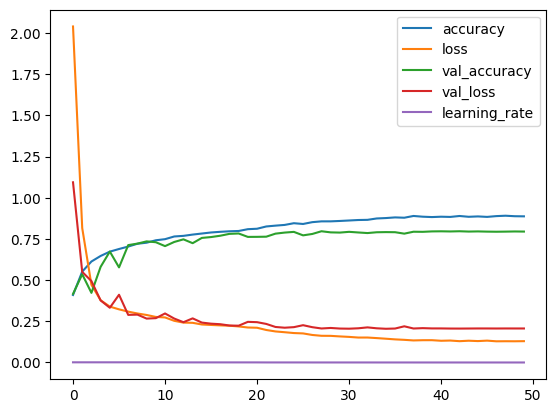

In [25]:
pd.DataFrame(history.history).plot();

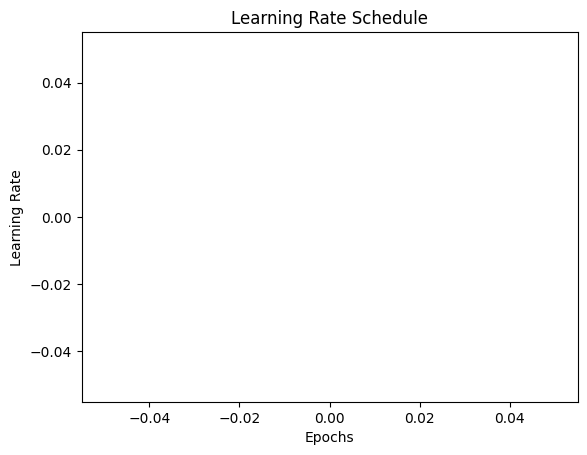

In [26]:
# Extract learning rates from history
lrs = [callback.learning_rate for callback in history.history.get('lr', [])]

# Plot learning rate schedule
plt.plot(lrs)
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.show()


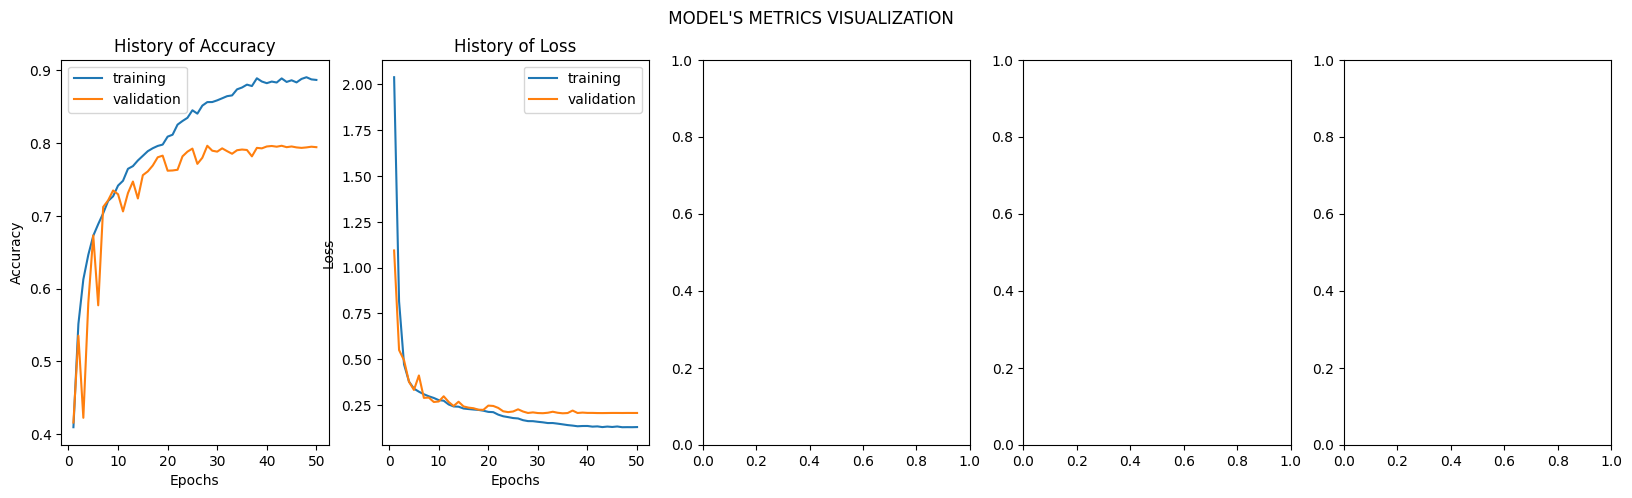

In [27]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

def Train_Val_Plot(acc,val_acc,loss,val_loss):

    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])

    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])

    plt.show()

Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'])

97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


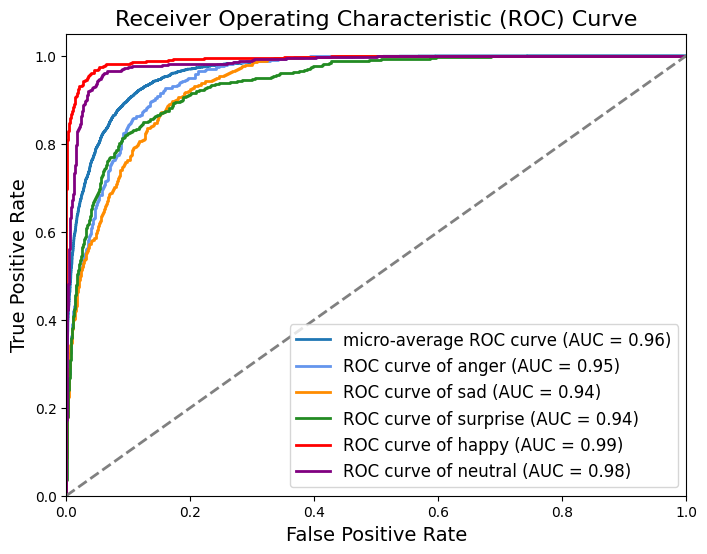

In [28]:
# calculates the false positive rate, true positive rate, and AUC score

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Make predictions
y_pred = model_4.predict(X_test)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = roc_auc_score(y_test, y_pred, multi_class='ovr')

# Plot the ROC curves for each class and the micro-average ROC curve
plt.figure(figsize=(8, 6))
lw = 2
plt.plot(fpr["micro"], tpr["micro"], lw=lw, label='micro-average ROC curve (AUC = {0:0.2f})'
                                                   ''.format(roc_auc["micro"]))
colors = ['cornflowerblue', 'darkorange', 'forestgreen', 'red', 'purple', 'gray', 'black', 'pink']
for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of {0} (AUC = {1:0.2f})'.format(emotion_label[i][1], roc_auc[i]))
    
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.show()

In [29]:
# Compute classification report



from sklearn.metrics import classification_report



# Convert one-hot encoded y_test back to integers

y_test_int = np.argmax(y_test, axis=1)



# Make predictions

y_pred = model_4.predict(X_test)



# Convert one-hot encoded y_pred back to integers

y_pred_int = np.argmax(y_pred, axis=1)



# Generate classification report

print(classification_report(y_test_int, y_pred_int))

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       618
           1       0.70      0.69      0.70       619
           2       0.74      0.74      0.74       618
           3       0.92      0.92      0.92       618
           4       0.88      0.89      0.89       618

    accuracy                           0.79      3091
   macro avg       0.79      0.79      0.79      3091
weighted avg       0.79      0.79      0.79      3091



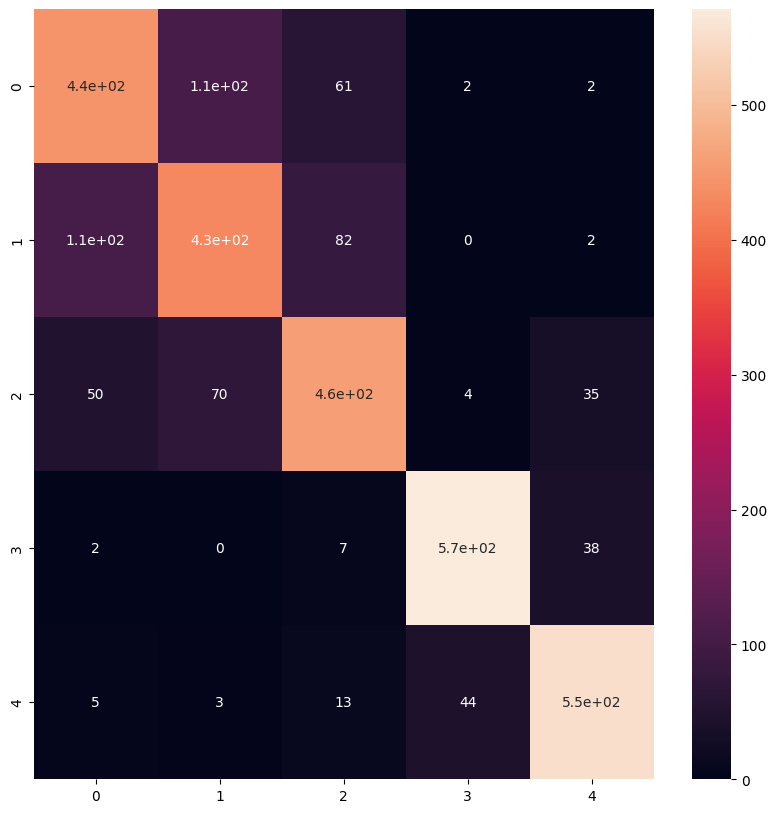

In [30]:
import seaborn as sns

from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix

plt.figure(figsize=(10, 10))

cm=confusion_matrix(y_test_int, y_pred_int)

sns.heatmap(cm, annot=True)

plt.show()

In [31]:
# save the model

model_4.save('/kaggle/working/model_4.h5')

In [32]:
!pip install mtcnn

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


ERROR: Could not find a version that satisfies the requirement mtcnn (from versions: none)
ERROR: No matching distribution found for mtcnn


In [33]:
# now let's modify our function to draw the emotion probability out of all 8 emotions

from mtcnn import MTCNN



import cv2



def detect_faces_emo(image_path, detection_confidence=0.99, min_face_size=10):

    # Load the image using OpenCV

    image = cv2.imread(image_path)



    # Create an MTCNN detector instance

    detector = MTCNN()



    # Use the detector to detect faces in the image

    faces = detector.detect_faces(image)



    # Loop over the detected faces

    for face in faces:

        # Check the confidence score of the detection

        if face['confidence'] < detection_confidence:

            continue

        # Extract the bounding box coordinates

        x, y, width, height = face['box']

        # Check the size of the bounding box

        if min(width, height) < min_face_size:

            continue



        # Extract the face region from the image

        face_image = image[y:y+height, x:x+width]

        # Resize the face image to 96x96

        face_image_resized = cv2.resize(face_image, (96, 96))

        # Reshape the face image to match the input shape of the model

        face_image_reshaped = face_image_resized.reshape((1, 96, 96, 3))

        # Use the model to predict the emotion of the face

        predicted_emo = model_4.predict(face_image_reshaped)[0]

        predicted_emo_sorted = sorted(list(enumerate(predicted_emo)), key=lambda x: x[1], reverse=True)



        # Extract the predicted probabilities for each emotion category

        # Extract the predicted probabilities for each emotion category

        probabilities = ["{}".format(round(prob * 100)) for index, prob in predicted_emo_sorted]



        # Draw the predicted emotion label on the rectangle around the face

        label = EMOTIONS[np.argmax(predicted_emo)]

        cv2.putText(image, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1.8, (0, 255, 0), 3)



        # Draw a square rectangle around the face

        face_size = min(width, height)

        x_center = x + int(width / 2)

        y_center = y + int(height / 2)

        x1 = x_center - int(face_size / 2)

        y1 = y_center - int(face_size / 2)

        x2 = x_center + int(face_size / 2)

        y2 = y_center + int(face_size / 2)

        cv2.rectangle(image, (x1, y1), (x2, y2), (127, 255, 0), 2)



        # Draw a vertical table with the predicted emotion probabilities

        table_x, table_y = x1, y2 + 20

        for index, prob in predicted_emo_sorted:

            table_y += 40

            emotion = EMOTIONS[index]

            cv2.putText(image, emotion, (table_x, table_y), cv2.FONT_HERSHEY_SIMPLEX, 1.6, (255, 255, 255), 3)

            cv2.putText(image, "{}%".format(round(prob * 100)), (table_x + 250, table_y), cv2.FONT_HERSHEY_SIMPLEX, 1.4, (255, 255, 255), 3)



    # Save the image with the detected faces and predicted emotions to a file

    cv2.imwrite("detected_faces.jpg", image)



    # Return the path to the saved file

    return "detected_faces.jpg"

ModuleNotFoundError: No module named 'mtcnn'

In [ ]:
from IPython.display import Image

# Detect faces in the new image of my friends and save the result to a file

image_path = detect_faces_emo('/kaggle/input/caffe-model/face-detection-caffee-main/face-detection-caffee-main/media/sample9.jpg')

# Display the saved image

Image(filename=image_path)

In [ ]:
from IPython.display import Image

# Detect faces in the new image of my friends and save the result to a file

image_path = detect_faces_emo('/kaggle/input/caffe-model/face-detection-caffee-main/face-detection-caffee-main/media/sample2.jpg')

# Display the saved image

Image(filename=image_path)

In [ ]:
from IPython.display import Image

# Detect faces in the new image of my friends and save the result to a file

image_path = detect_faces_emo('/kaggle/input/caffe-model/face-detection-caffee-main/face-detection-caffee-main/media/sample3.jpg')

# Display the saved image

Image(filename=image_path)

In [ ]:
from IPython.display import Image

# Detect faces in the new image of my friends and save the result to a file

image_path = detect_faces_emo('/kaggle/input/caffe-model/face-detection-caffee-main/face-detection-caffee-main/media/sample4.jpg')

# Display the saved image

Image(filename=image_path)

In [ ]:
from IPython.display import Image

# Detect faces in the new image of my friends and save the result to a file

image_path = detect_faces_emo('/kaggle/input/caffe-model/face-detection-caffee-main/face-detection-caffee-main/media/sample5.jpg')

# Display the saved image

Image(filename=image_path)